In [11]:
import numpy as np
import obspy
from obspy.clients.fdsn import Client
import matplotlib.pyplot as plt
from collections import defaultdict
import pandas as pd
import time
import matplotlib.dates as mdates
from datetime import datetime, timedelta

pi = 3.1415926
degree2km = pi * 6371 / 180

In [12]:
region_name = "Ridgecrest_demo"
center = (-117.504, 35.705)
horizontal_degree = 1.0
vertical_degree = 1.0
starttime = obspy.UTCDateTime("2019-07-04T17")
endtime = obspy.UTCDateTime("2019-07-04T19")
client = "SCEDC"
network_list = ["CI"]
channel_list = "HHZ"

In [13]:
config = {}
config["region"] = region_name
config["center"] = center
config["xlim_degree"] = [center[0] - horizontal_degree / 2, center[0] + horizontal_degree / 2]
config["ylim_degree"] = [center[1] - vertical_degree / 2, center[1] + vertical_degree / 2]
config["degree2km"] = degree2km
config["starttime"] = starttime.datetime.isoformat()
config["endtime"] = endtime.datetime.isoformat()
config["networks"] = network_list
config["channels"] = channel_list
config["client"] = client

In [14]:
stations = Client(config["client"]).get_stations(
    network=",".join(config["networks"]),
    station="*",
    starttime=config["starttime"],
    endtime=config["endtime"],
    minlongitude=config["xlim_degree"][0],
    maxlongitude=config["xlim_degree"][1],
    minlatitude=config["ylim_degree"][0],
    maxlatitude=config["ylim_degree"][1],
    channel=config["channels"],
    level="response",
)  # ,

In [15]:
exclude_stations = ["LRL", "SLA", "Q0072"]

In [16]:
station_locs = defaultdict(dict)
for network in stations:
    for station in network:
        for chn in station:
            if station.code in exclude_stations:
                continue
            sid = f"{network.code}.{station.code}.{chn.location_code}.{chn.code[:-1]}"
            if sid in station_locs:
                station_locs[sid]["component"] += f",{chn.code[-1]}"
                station_locs[sid]["response"] += f",{chn.response.instrument_sensitivity.value:.2f}"
            else:
                component = f"{chn.code[-1]}"
                response = f"{chn.response.instrument_sensitivity.value:.2f}"
                dtype = chn.response.instrument_sensitivity.input_units.lower()
                tmp_dict = {}
                tmp_dict["longitude"], tmp_dict["latitude"], tmp_dict["elevation(m)"] = (
                    chn.longitude,
                    chn.latitude,
                    chn.elevation,
                )
                tmp_dict["component"], tmp_dict["response"], tmp_dict["unit"] = component, response, dtype
                station_locs[sid] = tmp_dict

station_locs = pd.DataFrame.from_dict(station_locs, orient='index')
# station_locs.to_csv(
#     "station.csv",
#     sep="\t",
#     float_format="%.3f",
#     index_label="station",
#     columns=["longitude", "latitude", "elevation(m)", "unit", "component", "response"],
# )
station_locs

,longitude,latitude,elevation(m),component,response,unit
CI.CCC..HH,-117.36453,35.52495,670.0,Z,627368000.00,m/s
CI.CLC..HH,-117.59751,35.81574,775.0,Z,627368000.00,m/s
CI.DTP..HH,-117.84581,35.26742,908.0,Z,627368000.00,m/s
CI.JRC2..HH,-117.80885,35.98249,1469.0,Z,790478000.00,m/s
CI.MPM..HH,-117.48901,36.05799,1839.0,Z,627368000.00,m/s
CI.SRT..HH,-117.75051,35.69235,667.0,Z,629145000.00,m/s
CI.TOW2..HH,-117.76488,35.80856,685.0,Z,626838000.00,m/s
CI.WBM..HH,-117.89049,35.60839,892.0,Z,314573000.00,m/s
CI.WCS2..HH,-117.76526,36.02521,1143.0,Z,626838000.00,m/s
CI.WMF..HH,-117.85486,36.11758,1537.4,Z,625790000.00,m/s


In [17]:
events = [
["2019-07-08T00:00:02.602",	0.842,	-117.520, 35.666, 16099.143, 0.309, 0.348, 0.009],
["2019-07-08T00:00:36.266",	0.732,	-117.655, 35.928, 9.582, 1.087, 0.309, -0.115],
["2019-07-08T00:01:57.554",	1.171,	-117.929, 36.208, 0.000, 2.056, 0.403, -0.043],
# ["2019-07-08T00:03:01.799", 0.897,	-117.648, 36.017, 14623.906, 2.912, 0.515, 0.037],
# ["2019-07-08T00:03:11.713", 0.831,	-117.824, 35.997, 7947.798,  1.603, 0.229, 0.061],
["2019-07-08T00:03:20.519", 1.063,	-117.689, 35.934, 12833.157, 0.608, 0.189, 0.002],
["2019-07-08T00:03:29.390", 0.438,	-117.744, 35.884, 767.469,   1.937, 0.461, 0.051],
["2019-07-08T00:03:36.456", 1.275,	-117.809, 36.080, 9876.259,  2.142, 0.213, 0.011],
["2019-07-08T00:04:13.122",	0.657,	-117.933, 36.214, 0.000,  1.039, 0.540, -0.017],
["2019-07-08T00:04:42.992",	1.024,	-117.789, 36.132, 9983.541, 1.088, 0.311, 0.084],
["2019-07-08T00:05:26.130", 0.113,	-117.830, 36.087, 1075.595, 0.504, 0.364, 0.025]
]

# ["2019-07-08T00:03:49.841", 1.017,	-117.835, 36.039, 5193.985,  0.714, 0.177, 0.016]]
# events = [
# ["2019-07-08T00:03:01.799", 0.897,	-117.59751,	35.81574, 14623.906, 2.912, 0.515, 0.037],
# ["2019-07-08T00:03:11.713", 0.831,	-117.824, 35.997, 7947.798,  1.603, 0.229, 0.061],
# ["2019-07-08T00:03:20.519", 1.063,	-117.689, 35.934, 12833.157, 0.608, 0.189, 0.002],
# ["2019-07-08T00:03:29.390", 0.438,	-117.744, 35.884, 767.469,   1.937, 0.461, 0.051],
# ["2019-07-08T00:03:36.456", 1.275,	-117.809, 36.080, 9876.259,  2.142, 0.213, 0.011],
# ["2019-07-08T00:03:49.841", 1.017,	-117.835, 36.039, 5193.985,  0.714, 0.177, 0.016]]

In [42]:
def plot_stream(stream, station_locs, event):
    event_lng, event_lat = event[2], event[3]
    dists = []
    vecs = []
    ids = []
    nt = len(stream[0].data) - 1
    for trace in stream:
        sta_lng, sta_lat = station_locs.loc[trace.id[:-1]]["longitude"], station_locs.loc[trace.id[:-1]]["latitude"]
        dist = np.sqrt((event_lng - sta_lng)**2 + (event_lat - sta_lat)**2) * degree2km
        # print(dist)
        dists.append(dist)
        vecs.append(trace.data[:nt])
        vecs.append(trace.data)
        ids.append(trace.id)
    vecs = np.array(vecs)
    dists = np.array(dists)

    vecs = vecs/np.std(vecs)
    
    normalize = lambda x: (x - np.mean(x)) / np.std(x)
    # plt.figure(figsize=(10, 10))
    plt.figure()
    for i, idx in enumerate(np.argsort(dists)):
        t = [datetime.fromisoformat(event[0]) + timedelta(seconds=x) for x in np.arange(0, len(vecs[idx])) / trace.stats.sampling_rate]
        # plt.plot(normalize(vecs[idx]) + dists[idx], 'k', linewidth=1.0)
        # plt.plot(t, normalize(vecs[idx])/7 + i , 'k', linewidth=0.5, rasterized=True)
        plt.plot(t, vecs[idx]/7 + i , 'k', linewidth=0.5, rasterized=True)
        # plt.text(t[0], i-0.5, ids[idx], color="b")
        # plt.plot(vecs[idx]*1e7 + dists[idx] , 'k', linewidth=1.0)
        # if i > 8:
        #     break
    # plt.ylim([0, 50])
    # plt.ylim([-0.9, 10])
    plt.gca().autoscale(enable=True, axis='x', tight=True)
    plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%M:%S'))
    plt.gcf().autofmt_xdate()
    plt.ylabel("Station index by distance")
    plt.xlabel("Time from 2019-07-08T00")
    print(event)
    plt.title(f'M = {event[1]:.1f}, '+ r'$\Sigma_{11}$ = ' + f"{event[5]:.1f}" + r' s$^2$' + ', ' +  r'$\Sigma_{22}$ = ' + f"{event[6]:.1f}" + r' ($\log_{10}$ m/s)$^2$')
    plt.savefig(f"figures/new_events/{event[0]}.png", dpi=300)
    plt.savefig(f"figures/new_events/{event[0]}.pdf", dpi=300)
    plt.show()
# plot_stream(stream, station_locs, events[-1])

In [43]:
interval = 9 
client = Client(config["client"])
for event in events:
    starttime = obspy.UTCDateTime(event[0]) + event[4]/1000/7
    endtime = starttime + interval
    fname = "{}.mseed".format(starttime.datetime.strftime("%Y-%m-%dT%H:%M:%S"))
    
    max_retry = 10
    stream = obspy.Stream()
    print(f"{fname} download starts")
    num_sta = 0
    for network in stations:
        for station in network:
            if station.code in exclude_stations:
                continue
            print(f"********{network.code}.{station.code}********")
            retry = 0
            while retry < max_retry:
                try:
                    tmp = client.get_waveforms(
                        network.code, station.code, "*", config["channels"], starttime, endtime,  attach_response=True
                    )
                    #  for trace in tmp:
                    #      if trace.stats.sampling_rate != 100:
                    #          print(trace)
                    #          trace = trace.interpolate(100, method="linear")
                    #      trace = trace.detrend("spline", order=2, dspline=5*trace.stats.sampling_rate)
                    #      stream.append(trace)
                    stream += tmp
                    num_sta += len(tmp)
                    break
                except Exception as err:
                    print("Error {}.{}: {}".format(network.code, station.code, err))
                    message = "No data available for request."
                    if str(err)[: len(message)] == message:
                        break
                    retry += 1
                    time.sleep(5)
                    continue
            if retry == max_retry:
                print(f"{fname}: MAX {max_retry} retries reached : {network.code}.{station.code}")
    stream = stream.merge()
    stream = stream.remove_sensitivity()
    stream = stream.detrend("spline", order=2, dspline=1*stream[0].stats.sampling_rate)
    # stream = stream.filter("highpass", freq=1.0)
    # stream.plot()
    plot_stream(stream, station_locs, event)
    plt.show()
    # break


2019-07-08T00:00:04.mseed download starts
********CI.CCC********
********CI.CLC********
********CI.DTP********
********CI.JRC2********
********CI.MPM********
********CI.SRT********
********CI.TOW2********
********CI.WBM********
********CI.WCS2********
********CI.WMF********


In [20]:
station_id = ["CLC", "CCC", "LRL", "SRT", "SLA", "TOW2", "WRC2", "WBM", "MPM", "WNM", "WVP2", "JRC2", "WCS2", "DTP", "WRV2", "WMF"]
network_id = ["CI"]
# channels = ["HHE","HHN","HHZ"]
channels = ["HHZ"]
## M6.4
# start_time = obspy.UTCDateTime("2019-07-04T17:33:49") - 60
# end_time = start_time + 120 
## M7.1
# start_time = obspy.UTCDateTime("2019-07-06T03:19:53") - 60
# end_time = start_time + 120
# start_time = obspy.UTCDateTime("2020-06-04T01:32:11") - 60
# end_time = start_time + 120 
# start_time = obspy.UTCDateTime("2020-06-24T17:40:49") - 60
start_time = obspy.UTCDateTime("2019-07-08T00:03:00") 
end_time = start_time + 80 

In [21]:
stream = client.get_waveforms(",".join(network_id), ",".join(station_id), "*", ",".join(channels), start_time, end_time, attach_response=True)
stream = stream.merge()
stream = stream.trim(start_time, end_time, fill_value=0)
stream = stream.sort()
stream = stream.remove_sensitivity()


In [22]:
events

[['2019-07-08T00:00:02.602',
  0.842,
  -117.52,
  35.666,
  16099.143,
  0.309,
  0.348,
  0.009],
 ['2019-07-08T00:00:36.266',
  0.732,
  -117.655,
  35.928,
  9.582,
  1.087,
  0.309,
  -0.115],
 ['2019-07-08T00:01:57.554',
  1.171,
  -117.929,
  36.208,
  0.0,
  2.056,
  0.403,
  -0.043],
 ['2019-07-08T00:03:20.519',
  1.063,
  -117.689,
  35.934,
  12833.157,
  0.608,
  0.189,
  0.002],
 ['2019-07-08T00:03:29.390',
  0.438,
  -117.744,
  35.884,
  767.469,
  1.937,
  0.461,
  0.051],
 ['2019-07-08T00:03:36.456',
  1.275,
  -117.809,
  36.08,
  9876.259,
  2.142,
  0.213,
  0.011],
 ['2019-07-08T00:04:13.122',
  0.657,
  -117.933,
  36.214,
  0.0,
  1.039,
  0.54,
  -0.017],
 ['2019-07-08T00:04:42.992',
  1.024,
  -117.789,
  36.132,
  9983.541,
  1.088,
  0.311,
  0.084],
 ['2019-07-08T00:05:26.130',
  0.113,
  -117.83,
  36.087,
  1075.595,
  0.504,
  0.364,
  0.025]]

In [23]:
# stream_bak = stream.copy()
stream = stream_bak.copy()
stream = stream.detrend("linear")
stream = stream.filter("bandpass", freqmin=0.5, freqmax=50, corners=2, zerophase=True)

NameError: name 'stream_bak' is not defined

In [ ]:
vec = []
amp = []
for sta in station_id:
    vec_sta = []
    for chn in channels:
        if len(stream.select(station=sta, channel=chn)) == 0:
            print(sta, chn)
        else:
            trace = stream.select(station=sta, channel=chn)[0]
        vec_sta.append(trace.data)
    vec.append(vec_sta)
    # amp.append(np.max(np.abs(vec_sta)))
    amp.append(np.std(vec_sta))
vec = np.array(vec)
amp = np.array(amp)
print(vec.shape) # nsta, nchn, npts

WNM HHZ
WVP2 HHZ
WRV2 HHZ
(16, 1, 6001)


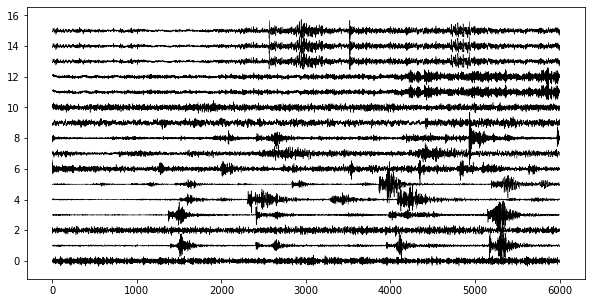

In [ ]:
plt.figure(figsize=(10,5))
idx = np.argsort(amp)
for ii, i in enumerate(idx[::-1]):
    plt.plot((vec[i, 0, :] - np.mean(vec[i, 0, :]))/amp[i]/10 + ii, 'k', linewidth=0.5)
plt.show()

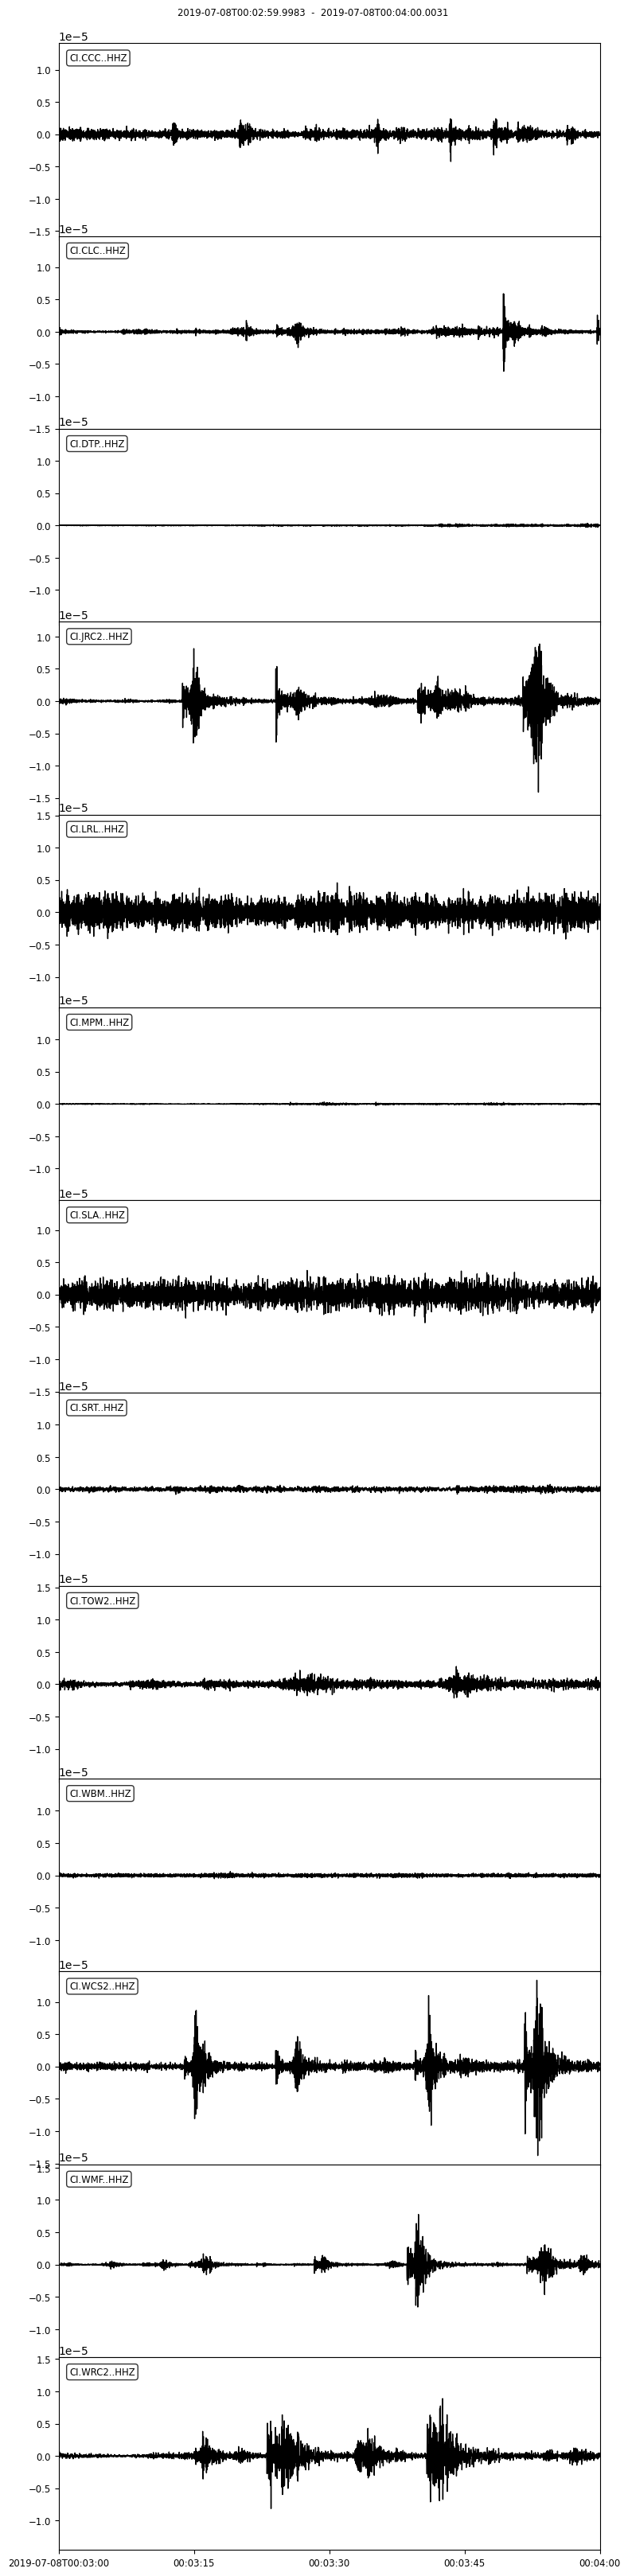

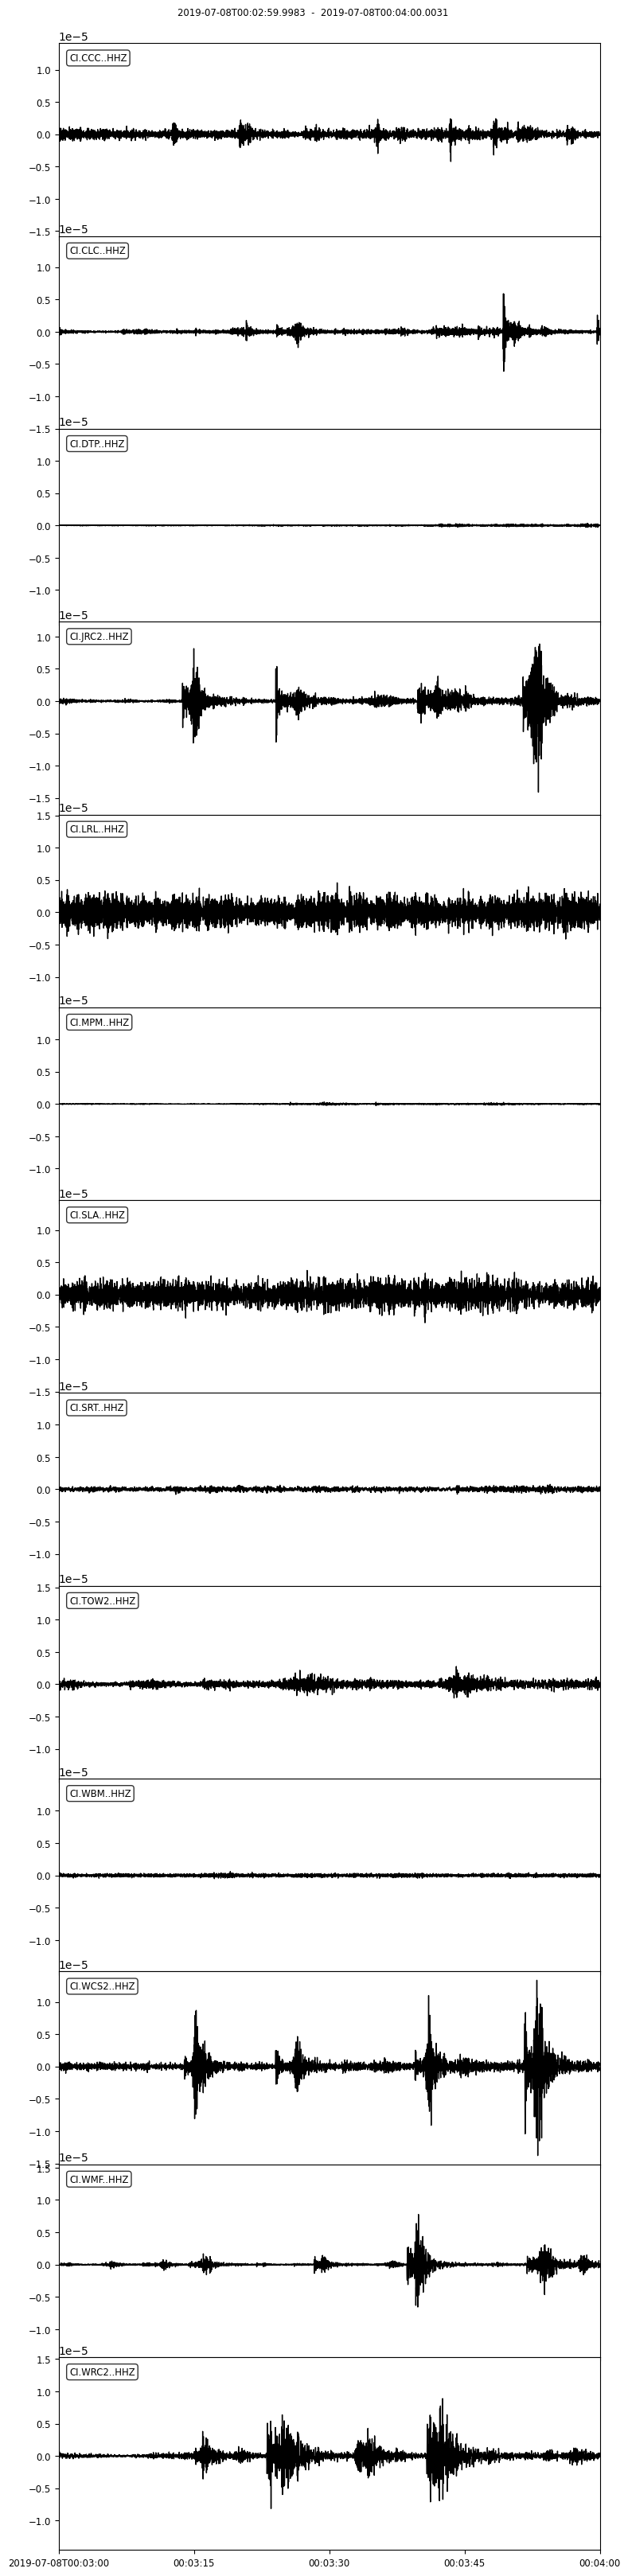

In [ ]:
stream.select(channel="*Z").plot()